In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
# fetch data 

covid_data = pd.read_csv('covid_data.csv')

us_country = pd.read_csv('us_county.csv')

land_area = pd.read_excel('LND01_land_area_columnH.xls')

land_area.rename(columns = {'STCOU' : 'fips'})
land_area.isna().any()
us_country.isna().any()
covid_data.isna().any()
us_country = us_country.dropna()
covid_data = covid_data.dropna()
land_area.isna().any()
us_country.isna().any()
covid_data.isna().any()
covid_data.head()
us_country.head()
land_area.head()

,Areaname,fips,LND010200D
0,UNITED STATES,0,"3,794,083.06"
1,ALABAMA,1000,"52,419.02"
2,"Autauga, AL",1001,604.45
3,"Baldwin, AL",1003,"2,026.93"
4,"Barbour, AL",1005,904.52
...,...,...,...
3193,"Sweetwater, WY",56037,"10,491.17"
3194,"Teton, WY",56039,"4,221.80"
3195,"Uinta, WY",56041,"2,087.56"
3196,"Washakie, WY",56043,"2,242.75"


Areaname      False
STCOU         False
LND010200D    False
dtype: bool

fips                 False
county               False
state                False
state_code            True
male                 False
female               False
median_age           False
population           False
female_percentage    False
lat                  False
long                 False
dtype: bool

fips           True
county         True
state         False
lat           False
long          False
date          False
cases         False
state_code     True
deaths        False
dtype: bool

Areaname      False
STCOU         False
LND010200D    False
dtype: bool

fips                 False
county               False
state                False
state_code           False
male                 False
female               False
median_age           False
population           False
female_percentage    False
lat                  False
long                 False
dtype: bool

fips          False
county        False
state         False
lat           False
long          False
date          False
cases         False
state_code    False
deaths        False
dtype: bool

,fips,county,state,lat,long,date,cases,state_code,deaths
0,"1,001.00",Autauga,Alabama,32.54,-86.64,2021-02-14,6023,AL,84
1,"1,003.00",Baldwin,Alabama,30.73,-87.72,2021-02-14,19105,AL,252
2,"1,005.00",Barbour,Alabama,31.87,-85.39,2021-02-14,2042,AL,48
3,"1,007.00",Bibb,Alabama,33.00,-87.13,2021-02-14,2395,AL,57
4,"1,009.00",Blount,Alabama,33.98,-86.57,2021-02-14,5961,AL,121


,fips,county,state,state_code,male,female,median_age,population,female_percentage,lat,long
0,1001,Autauga County,Alabama,AL,26874,28326,37.80,55200,51.32,32.53,-86.64
1,1003,Baldwin County,Alabama,AL,101188,106919,42.80,208107,51.38,30.73,-87.72
2,1005,Barbour County,Alabama,AL,13697,12085,39.90,25782,46.87,31.87,-85.39
3,1007,Bibb County,Alabama,AL,12152,10375,39.90,22527,46.06,33.00,-87.13
4,1009,Blount County,Alabama,AL,28434,29211,40.80,57645,50.67,33.98,-86.57


,Areaname,STCOU,LND010200D
0,UNITED STATES,0,"3,794,083.06"
1,ALABAMA,1000,"52,419.02"
2,"Autauga, AL",1001,604.45
3,"Baldwin, AL",1003,"2,026.93"
4,"Barbour, AL",1005,904.52


In [3]:
#land_area.rename(columns = {'STCOU' : 'fips'})
joint_data = pd.merge(us_country,land_area.rename(columns = {'STCOU' : 'fips'}), on=['fips'], how='inner')

In [4]:
print(joint_data)
dataframe = pd.merge(joint_data, covid_data, on='fips')

       fips             county    state state_code    male  female  \
0      1001     Autauga County  Alabama         AL   26874   28326   
1      1003     Baldwin County  Alabama         AL  101188  106919   
2      1005     Barbour County  Alabama         AL   13697   12085   
3      1007        Bibb County  Alabama         AL   12152   10375   
4      1009      Blount County  Alabama         AL   28434   29211   
...     ...                ...      ...        ...     ...     ...   
3134  56037  Sweetwater County  Wyoming         WY   22882   21235   
3135  56039       Teton County  Wyoming         WY   11911   11148   
3136  56041       Uinta County  Wyoming         WY   10505   10104   
3137  56043    Washakie County  Wyoming         WY    4137    3992   
3138  56045      Weston County  Wyoming         WY    3768    3332   

      median_age  population  female_percentage   lat    long        Areaname  \
0          37.80       55200              51.32 32.53  -86.64     Autauga, AL 

In [17]:
#dataframe.drop(dataframe[dataframe['LND010200D'] == 0].index)
#dataframe.drop(dataframe[dataframe['population'] >= 1000000].index)
subset_one = dataframe[dataframe['LND010200D'] != 0]
subset_end = subset_one[subset_one['population'] < 1000000]
#subset_end.loc[:,'population-density'] = subset_end['population']/subset_end['LND010200D']
#subset_end.loc[:,'case-ratio'] = subset_end['cases']/subset_end['population']
subset_end = subset_end.assign(population_density=lambda x: x.population / x.LND010200D)
subset_end = subset_end.assign(case_ratio=lambda x: x.cases / x.population)
print(subset_end)
subset_end = subset_end[subset_end['cases'] != 0]
print(subset_end)

       fips           county_x  state_x state_code_x    male  female  \
0      1001     Autauga County  Alabama           AL   26874   28326   
1      1003     Baldwin County  Alabama           AL  101188  106919   
2      1005     Barbour County  Alabama           AL   13697   12085   
3      1007        Bibb County  Alabama           AL   12152   10375   
4      1009      Blount County  Alabama           AL   28434   29211   
...     ...                ...      ...          ...     ...     ...   
3134  56037  Sweetwater County  Wyoming           WY   22882   21235   
3135  56039       Teton County  Wyoming           WY   11911   11148   
3136  56041       Uinta County  Wyoming           WY   10505   10104   
3137  56043    Washakie County  Wyoming           WY    4137    3992   
3138  56045      Weston County  Wyoming           WY    3768    3332   

      median_age  population  female_percentage  lat_x  ...    county_y  \
0          37.80       55200              51.32  32.53  ... 

In [6]:
cols = subset_end.columns
print(cols)
print(subset_end)

Index(['fips', 'county_x', 'state_x', 'state_code_x', 'male', 'female',
       'median_age', 'population', 'female_percentage', 'lat_x', 'long_x',
       'Areaname', 'LND010200D', 'county_y', 'state_y', 'lat_y', 'long_y',
       'date', 'cases', 'state_code_y', 'deaths', 'population_density',
       'case_ratio'],
      dtype='object')
       fips           county_x  state_x state_code_x    male  female  \
0      1001     Autauga County  Alabama           AL   26874   28326   
1      1003     Baldwin County  Alabama           AL  101188  106919   
2      1005     Barbour County  Alabama           AL   13697   12085   
3      1007        Bibb County  Alabama           AL   12152   10375   
4      1009      Blount County  Alabama           AL   28434   29211   
...     ...                ...      ...          ...     ...     ...   
3134  56037  Sweetwater County  Wyoming           WY   22882   21235   
3135  56039       Teton County  Wyoming           WY   11911   11148   
3136  56041   

male                 36,767.36
female               37,782.35
median_age               41.36
population           74,549.71
female_percentage        49.90
cases                 6,161.61
deaths                  107.96
population_density      164.05
case_ratio                0.09
dtype: float64

male                  68,770.10
female                71,845.35
median_age                 5.40
population           140,584.30
female_percentage          2.39
cases                 11,888.83
deaths                   231.35
population_density       552.11
case_ratio                 0.03
dtype: float64

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'female'}>,
        <AxesSubplot:title={'center':'median_age'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'female_percentage'}>,
        <AxesSubplot:title={'center':'cases'}>],
       [<AxesSubplot:title={'center':'deaths'}>,
        <AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'case_ratio'}>]], dtype=object)

<AxesSubplot:title={'center':'case_ratio'}>

male


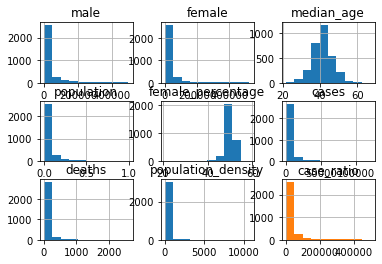

<AxesSubplot:>

female


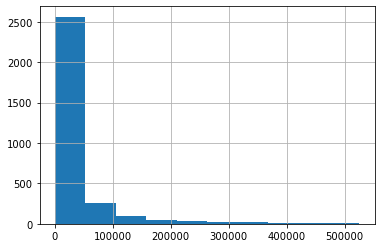

<AxesSubplot:>

median_age


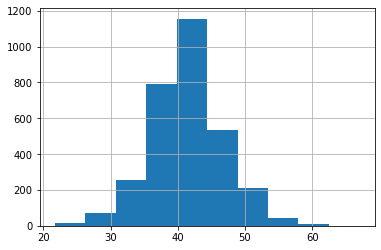

<AxesSubplot:>

population


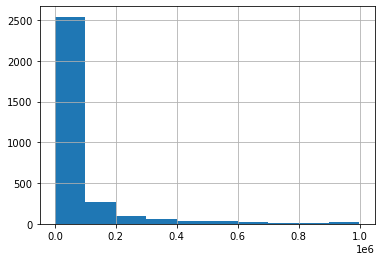

<AxesSubplot:>

female_percentage


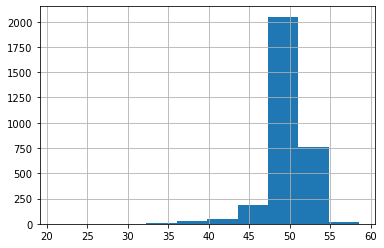

<AxesSubplot:>

cases


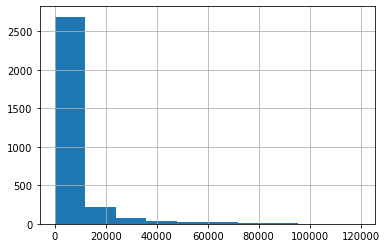

<AxesSubplot:>

deaths


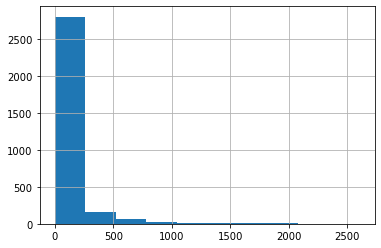

<AxesSubplot:>

population_density


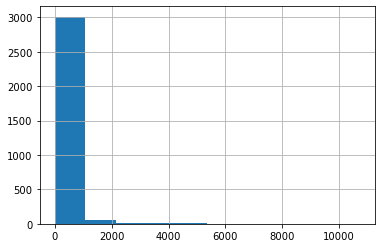

<AxesSubplot:>

case_ratio


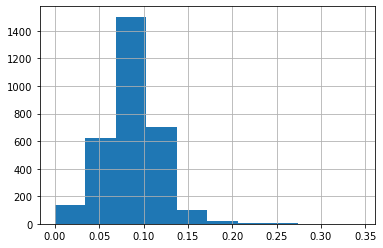

In [7]:
# fips:discrete  contry-x:categorical state_x: categorical state_code_x:categorical male: discrete famale: discrete
# median_age: discrete population: discrete female_percentage:discrete lat_x:continuous long_x:continuous Areaname: categorical
# LND010200D: continuous county_y:categorical state_y: categorical lat_y: continuous Long_y: continuous date: categorical
# cases: discrete stste_code_y: categotical deaths: discrete populatin-density: discrete case-ratio: discrete

subset_end[['male','female','median_age','population','female_percentage','cases','deaths','population_density','case_ratio']].mean()
subset_end[['male','female','median_age','population','female_percentage','cases','deaths','population_density','case_ratio']].std()
subset_end[['male','female','median_age','population','female_percentage','cases','deaths','population_density','case_ratio']].hist()

cols = ['male','female','median_age','population','female_percentage','cases','deaths','population_density','case_ratio']
for col in cols: 
    subset_end[col].hist()
    print(col)
    plt.show()
    

In [8]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

correl = subset_end.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')





y_value = subset_end['cases']
for col in cols:
    x_value = subset_end[col]
    plot_data1 = []
    plot_data1.append(go.Scatter(x = x_value, y = y_value, name = 'values', mode = 'markers'))
    layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'cases'), 
                       title = col+'/cases')
    fig = go.Figure(data= plot_data1, layout=layout)
    plotly.offline.iplot(fig)




In [9]:
# death, cases numbers are corelated to male and female numbers, also pupolations. Not very suprising

In [10]:
X_train, X_test, y_train, y_test = train_test_split(subset_end['population'], subset_end['cases'], test_size=0.33)
X_train
X_test
y_train
y_test

2748     21496
2910     28940
2674    248429
1399     31547
1837     48123
         ...  
3049     13167
1888    160576
1858    230782
1994      2213
2082     61215
Name: population, Length: 2071, dtype: int64

2517     26580
849      33207
2506    156734
1132     22348
2809      6965
         ...  
80       13649
2731    225015
1188     39418
1392     18809
1742      3571
Name: population, Length: 1021, dtype: int64

2748     1142
2910     1967
2674    24245
1399     2291
1837     3016
        ...  
3049     1335
1888    15020
1858    19158
1994      220
2082     3905
Name: cases, Length: 2071, dtype: int64

2517     3292
849      3309
2506    13823
1132     1976
2809       92
        ...  
80       1044
2731    18365
1188      566
1392     2031
1742      305
Name: cases, Length: 1021, dtype: int64

In [11]:
model = LinearRegression(fit_intercept = True)

model.fit(X_train.array.reshape(-1, 1), y_train)

model.score(X_train.array.reshape(-1, 1), y_train)

model.coef_ # this is beta 1, the slope of the regression function

model.intercept_ # this is beta 0

LinearRegression()

0.9121344652652139

array([0.08151964])

110.05113904766404

In [12]:
test_output = pd.DataFrame(model.predict(X_test.array.reshape(-1, 1)), index = X_test.index, columns = ['pred_cases'])
test_output.head()

,pred_cases
2517,"2,276.84"
849,"2,817.07"
2506,"12,886.95"
1132,"1,931.85"
2809,677.84


In [13]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_cases'] - test_output['cases']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_cases,cases
2517,"2,276.84",3292
849,"2,817.07",3309
2506,"12,886.95",13823
1132,"1,931.85",1976
2809,677.84,92


Mean absolute error is 
1377.8529279589459


In [14]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns


In [15]:
plot_data = []
plot_data.append(go.Scatter(x= X_train, y= y_train, name = 'Train data actual', mode = 'markers'))
plot_data.append(go.Scatter(x= X_train, y= model.predict(X_train.array.reshape(-1, 1)), name = 'Train data predicted', mode = 'markers'))
plot_data.append(go.Scatter(x= X_test, y= y_test, name = 'Test data actual', mode = 'markers'))
plot_data.append(go.Scatter(x= X_test, y= model.predict(X_test.array.reshape(-1, 1)), name = 'Test data predicted', mode = 'markers'))
# When extending to multiple features remove .array.reshape(-1, 1) in above (but remember 2-d we cannot draw)

layout = go.Layout(xaxis = dict(title='population'), yaxis = dict(title= 'cases'), 
                   title = 'Plot of predicted and actual')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)